## Table of Contents
* [Characteristics](#char)
* [Publication Year](#pub)
* [Embedding](#emb)
* [Parsing](#pars)

## characteristics <a class="anchor" id="char"></a>

In [1]:
import datetime
import pandas as pd
import json
import numpy as np

In [2]:
df_hDe = pd.read_csv("../../dataset/CLCTS_corpus/CLCTS_hDe.csv")
df_hEn = pd.read_csv("../../dataset/CLCTS_corpus/CLCTS_hEn.csv")

In [3]:
hDe = df_hDe.dropna(subset = ["summary_de"])
print(hDe.count().loc[["document", "summary", "summary_de"]], "\n\n" , hDe.mean(axis = 0)[2:].round(2))
hEn_De = df_hEn.dropna(subset = ["summary"])
print(hEn_De.count().loc[["document", "summary"]], "\n\n", hEn_De.mean(axis = 0).loc[["token_doc", "token_sum"]].round(2))
hEn_En = df_hEn.dropna(subset = ["summary_en"])
print(hEn_En.count().loc[["document", "summary_en"]], "\n\n", hEn_En.mean(axis = 0).loc[["token_doc", "token_sum_ol"]].round(2))

/var/folders/2n/4742tn7s13l5fcnstlm_d7g40000gn/T/ipykernel_99223/1272594870.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(hDe.count().loc[["document", "summary", "summary_de"]], "\n\n" , hDe.mean(axis = 0)[2:].round(2))
/var/folders/2n/4742tn7s13l5fcnstlm_d7g40000gn/T/ipykernel_99223/1272594870.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(hEn_De.count().loc[["document", "summary"]], "\n\n", hEn_De.mean(axis = 0).loc[["token_doc", "token_sum"]].round(2))


document      328
summary       328
summary_de    328
dtype: int64 

 token_doc       1398.37
token_sum        324.28
token_sum_ol     217.37
dtype: float64
document    289
summary     289
dtype: int64 

 token_doc    9643.27
token_sum     413.99
dtype: float64
document      276
summary_en    276
dtype: int64 

 token_doc       9847.24
token_sum_ol     488.05
dtype: float64


/var/folders/2n/4742tn7s13l5fcnstlm_d7g40000gn/T/ipykernel_99223/1272594870.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(hEn_En.count().loc[["document", "summary_en"]], "\n\n", hEn_En.mean(axis = 0).loc[["token_doc", "token_sum_ol"]].round(2))


## Publication Year <a class="anchor" id="pub"></a>

In [4]:
import pandas as pd
import json
from langdetect import detect
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
with open("../../dataset/external_corpus/Histsumm/Histsumm_de.json", encoding='utf-8-sig') as f:
    histsum = json.load(f)

In [6]:
histsum = pd.DataFrame(histsum["text"])

In [7]:
histsum["Year"] = histsum.time.apply(lambda x: int(x.split("-")[0]))

In [8]:
de_processed = df_hDe
en_processed = df_hEn
print(de_processed.id.nunique(), en_processed.id.nunique())

329 289


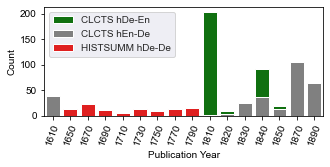

In [9]:
plt.subplots(figsize = (5,2))
sns.set_style("dark")
newBins = [1610]
newBins.extend(list(range(1650, 1800, 20)))
newBins.extend(list(range(1810, 1850, 10)))
newBins.extend(list(range(1850, 1930, 20)))
hist1, _ = np.histogram(de_processed.Year, bins=newBins, )
df = pd.DataFrame({"count": hist1, "bins":range(len(hist1)), "lang":["CLCTS hDe-En"]*len(hist1)})
hist2, _ = np.histogram(en_processed.Year, bins=newBins)
df = df.append(pd.DataFrame({"count": hist2, "bins":range(len(hist1)), "lang":["CLCTS hEn-De"]*len(hist1)}))
hist3, _ = np.histogram(histsum.Year, bins=newBins)
df = df.append(pd.DataFrame({"count": hist3, "bins":range(len(hist1)), "lang":["HISTSUMM hDe-De"]*len(hist1)}))
# plot a bar diagram
sns.barplot(data = df, x ="bins", y = "count", hue = "lang", palette= ("green", "gray", "red"),dodge=False)
plt.xticks(range(len(hist1)),newBins[:-1])
plt.xlabel("Publication Year")
plt.ylabel("Count")
plt.legend(title = "")
plt.xticks(rotation=70)
plt.show()

# cross-lingual embedding distance <a class="anchor" id="emb"></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

In [11]:
english = pd.read_pickle("./statistics_english_sent.pkl")
german = pd.read_pickle("./statistics_german_sent.pkl")

In [12]:
# table 2 statistics
english[english.n_tokens > 1].groupby(["dataset", "col"]).n_tokens.mean().round(1)

dataset   col                 
CLCT_hDe  reference_summary_tl    18.6
CLCT_hEn  reference_summary_sl    20.2
          text                    16.0
cnndm     article                 20.5
          highlights              14.5
wiki      document_en             16.5
          summary_en               6.5
Name: n_tokens, dtype: float64

In [13]:
# table 2 statistics
german[german.n_tokens > 1].groupby(["dataset", "col"]).n_tokens.mean().round(1)

dataset   col                 
CLCT_hDe  reference_summary_sl    16.6
          text                    25.4
CLCT_hEn  reference_summary_tl    19.2
histsum   story                   36.3
          summary                 12.4
mlsum     doc                     17.8
          summary                 12.7
wiki      document_de             15.8
          summary_de               6.9
Name: n_tokens, dtype: float64

In [14]:
res = pd.read_csv("./embedding_distance/all_datasets_embedding_distance.csv")

In [15]:
res.groupby(["dataset", "doc-sum"]).similarity.mean().round(2)

dataset   doc-sum                  
CLCT_hDe  text-reference_summary_sl    0.38
          text-reference_summary_tl    0.33
CLCT_hEn  text-reference_summary_sl    0.25
          text-reference_summary_tl    0.27
cnndm     article-highlights           0.32
histsum   story-summary                0.39
mlsum     doc-summary                  0.37
wiki      document_de-summary_de       0.46
          document_de-summary_en       0.42
          document_en-summary_de       0.42
          document_en-summary_en       0.42
Name: similarity, dtype: float64

# Parsing  <a class="anchor" id="pars"></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
stanza_de = pd.read_csv("./parsing/german_parsing_result_stanford_all.csv")
de = german

In [18]:
de = pd.merge(de, stanza_de, on = "sentence", how = "left")
parse = pd.DataFrame(de[de.n_tokens>3].groupby(["dataset", "col"]).mean()).reset_index()

In [19]:
parse["doc-sum"] = parse.col.apply(lambda x: "summary" if "sum" in x else "document")
df = parse.set_index("dataset").loc[['CLCT_hDe', 'histsum', 'mlsum', 'wiki']].reset_index()
df = pd.melt(df[["dataset", "dependency_distance_mean", "mean_height", "doc-sum"]], id_vars=['dataset', "doc-sum"],)
df["heu"] = df.apply(lambda x:"-".join([x["doc-sum"], x["variable"]]),axis = 1)
parse["dataset"].unique()

array(['CLCT_hDe', 'CLCT_hEn', 'histsum', 'mlsum', 'wiki'], dtype=object)

In [20]:
en = english
stanza_en = pd.read_csv("./parsing/english_parsing_result_stanford_all.csv")

In [21]:
merged = pd.merge(en, stanza_en, on = "sentence", how = "right")
merged = merged.drop_duplicates()

In [22]:
parse_ = pd.DataFrame(merged[merged.n_tokens>3].groupby(["dataset", "col"]).mean()).reset_index()
parse_["doc-sum"] = parse_.col.apply(lambda x: "summary" if ("sum" in x) or ("high" in x) else "document")

In [23]:
df_ = parse_.set_index("dataset").loc[['CLCT_hEn', 'cnndm', 'wiki']].reset_index()
df_ = pd.melt(df_[["dataset", "dependency_distance_mean", "mean_height", "doc-sum"]], id_vars=['dataset', "doc-sum"],)
df_["heu"] = df_.apply(lambda x:"-".join([x["doc-sum"], x["variable"]]),axis = 1)

In [24]:
df_.dataset = df_.dataset.replace({"wiki":"wiki_en"})

In [25]:
all_ = df.append(df_).reset_index()

Text(0, 0.5, 'Mean Dependency Distance')

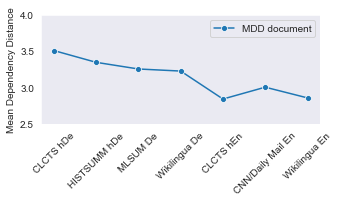

In [26]:
plt.subplots(figsize = (5,2))
sns.set_style("dark")
sns.lineplot(x = "dataset", y = "value", data = all_[(all_["doc-sum"] == "document") & 
                                                     (all_["variable"] == "dependency_distance_mean")], hue ="heu", style = "heu",  marker = "o")
plt.legend(title = "", labels = ["MDD document"])#labels = ["MDD summary", "MDD document", "MTH summary", "MTH document"])
plt.xticks(list(range(7)), 
           ["CLCTS hDe", "HISTSUMM hDe", "MLSUM De", "Wikilingua De", 
            "CLCTS hEn", "CNN/Daily Mail En", "Wikilingua En"],
          rotation=45)
plt.ylim([2.5, 4])
plt.xlabel('')
plt.ylabel('Mean Dependency Distance')